In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

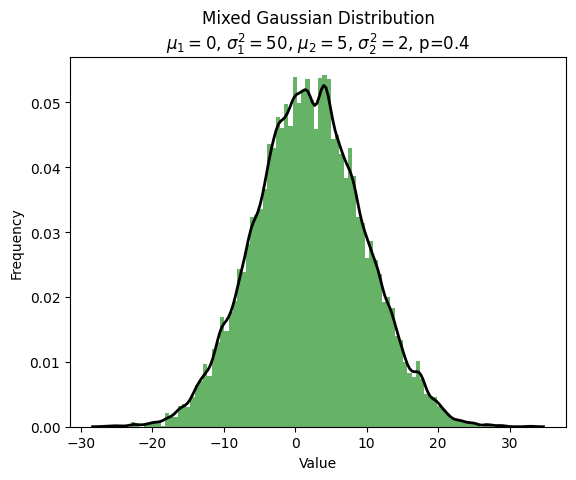

In [3]:
def generate_mixed_gaussian(mu1, sigma1, mu2, sigma2, p, size=10000,seed=None):
    if seed is not None:
        np.random.seed(seed)
    eta = np.random.choice([0, 1], size=size, p=[1-p, p])
    X = np.random.normal(mu1, np.sqrt(sigma1), size)
    Y = np.random.normal(mu2, np.sqrt(sigma2), size)
    Z = X + eta * Y
    return Z

def plot_histogram(data, title):
    # 直方图绘制
    plt.hist(data, bins=100, density=True, alpha=0.6, color='g')

    # 使用Seaborn的kdeplot绘制核密度估计轮廓线
    sns.kdeplot(data, bw_adjust=0.5, color='k', linewidth=2)

    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# 参数
mu1, sigma1 = 0, 50
mu2, sigma2 = 5, 2
p = 0.4
seed = 52

# 生成混合高斯分布的随机数
data = generate_mixed_gaussian(mu1, sigma1, mu2, sigma2, p, seed=seed)

# 画出频率分布直方图
plot_histogram(data, f'Mixed Gaussian Distribution\n$\mu_1={mu1}$, $\sigma_1^2={sigma1}$, $\mu_2={mu2}$, $\sigma_2^2={sigma2}$, p={p}')

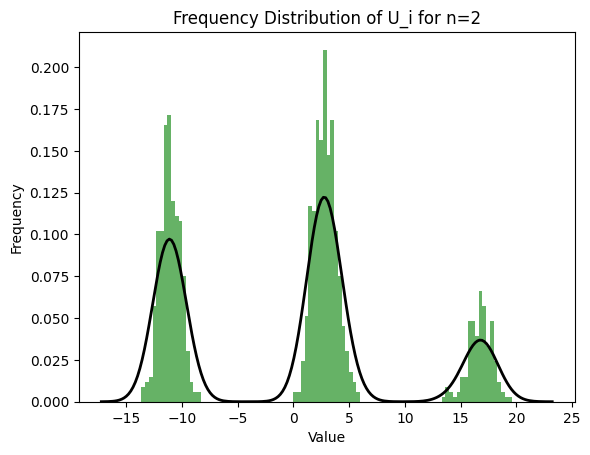

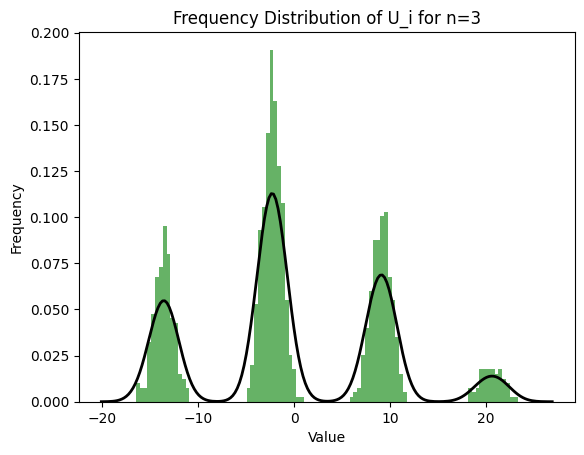

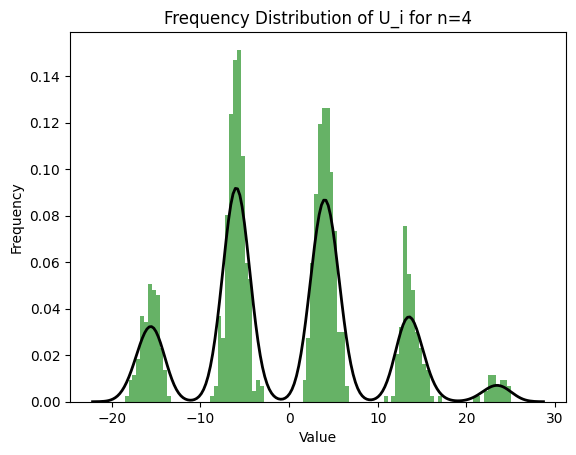

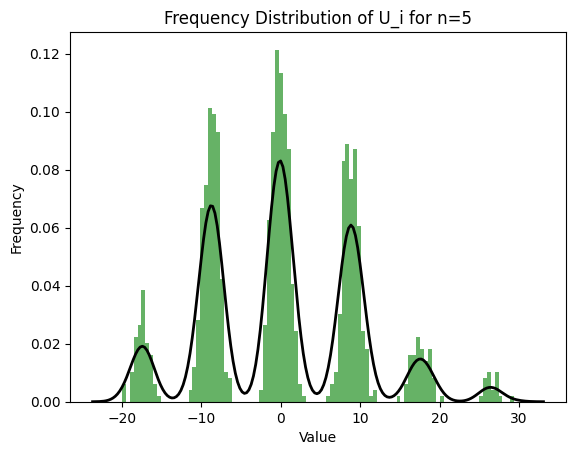

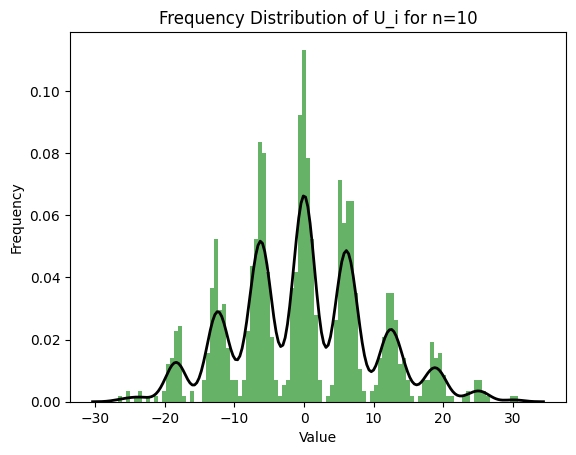

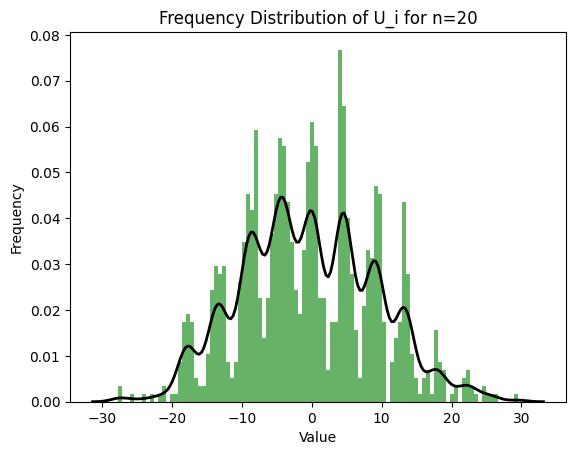

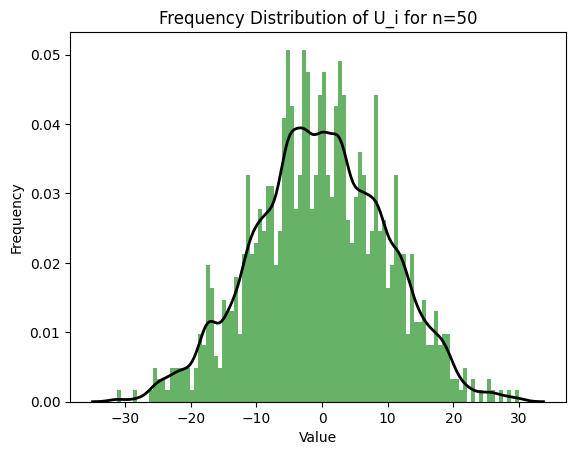

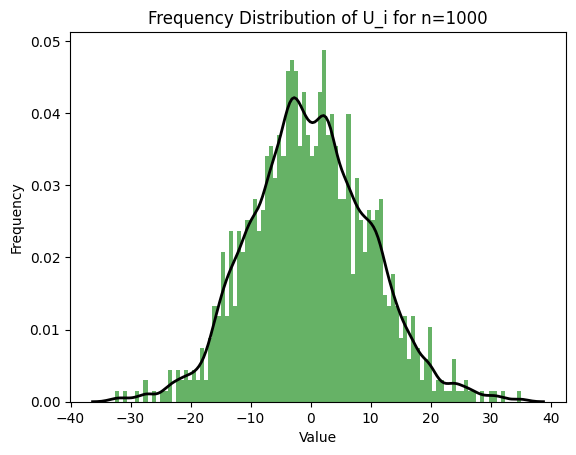

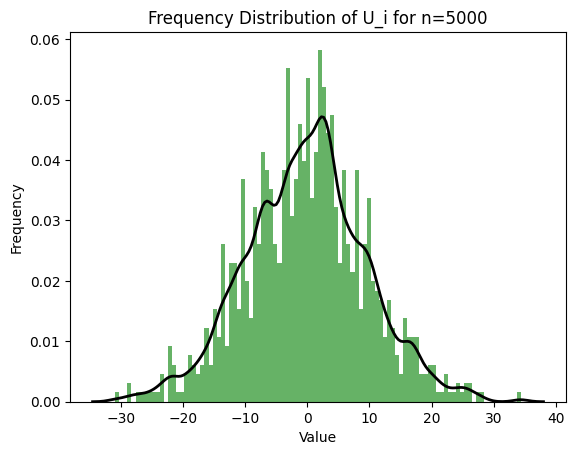

In [36]:
def calculate_U(n, EZ, DZ, mu1, sigma1, mu2, sigma2, p):
    U = []
    for i in range(1000):
        Z = generate_mixed_gaussian(mu1, sigma1, mu2, sigma2, p, size=n, seed=i)
        U_i = (1 / np.sqrt(n * DZ)) * (np.sum(Z) - n * EZ)
        U.append(U_i)
    return U

def plot_histogram(data, title):
    # 绘制直方图
    plt.hist(data, bins=100, density=True, alpha=0.6, color='g')
    
    # 使用Seaborn的kdeplot绘制核密度估计轮廓线
    sns.kdeplot(data, bw_adjust=0.5, color='k', linewidth=2)
    
    # 添加标题和标签
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# 参数
mu1, sigma1 = 0, 1
mu2, sigma2 = 20, 0.1
p = 0.4
seed = 3

# 计算混合高斯分布的期望和方差
EZ = mu1 * (1 - p) + (mu1 + mu2) * p
DZ = sigma1 * (1 - p) + (sigma1 + sigma2) * p

# 不同的n值
n_values = [2, 3, 4, 5, 10, 20, 50, 1000, 5000]

for n in n_values:
    U = calculate_U(n, EZ, DZ, mu1, sigma1, mu2, sigma2, p)
    plot_histogram(U, f'Frequency Distribution of U_i for n={n}')